<a href="https://colab.research.google.com/github/ulwanfaqih/Portofolio/blob/main/CleaningData_EDA_FeatureSelection_pada_Dataset_Penyakit_Ginjal_Kronis_(PGK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cleaning Data, EDA, and Feature Selection pada Dataset Penyakit Ginjal Kronis (PGK)**
oleh Muhammad Ulwan Faqih


---



Tujuan : Treatment Pre-Modelling Data
1. Melakukan Pre-Processing terhadap dataset
2. Melakukan Exploratory Data Analysis (EDA)
3. Melakukan Seleksi Fitur

---


---



# Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler

import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import random
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---


---




# DATA

**Import Data**

In [2]:
dataset = pd.read_excel(r'https://drive.google.com/uc?export=download&id=1zV3EZRWWePzi8w6ZLW10RH62snhM5dQH')
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


Dataset yang digunakan diperoleh dari UCI Repository Machine Learning.
Dataset tersebut berupa data klinis 400 data responden dari Apollo Hospital yang terdiri dari 250
data yang terkena PGK dan 150 data yang tidak terkena PGK. Dataset terdiri dari 25 feature dan 1
kelas target (ckd/notckd).

Kolom - Kolom Variabel tersebut adalah :
1. id = Nomor Identitas Pasien
2. age = Usia
3. bp = Blood Pressure
4. sg = Spesific Gravity
5. al = Albumin
6. su = Sugar
7. rbc = Red Blood Cells
8. pc = Pus Cell
9. pcc = Pus Cell Clumps
10. ba = Bacteria
11. bgr = Blood Glucose Random
12. bu = Blood Urea
13. sc = Serum Creatinine
14. sod = Sodium
15. pot = Potassium
16. hemo = Hemoglobin
17. pcv = Packed Cell Volume
18. wc = White Blood Cell Count
19. rc = Red blood Cell Count
20. htn = Hypertension
21. dm = Diabetes Mellitus
22. cad = Coronary Artery Disease
23. appet = Appetite
24. pe = Pedal Edema
25. ane = Anemia
26. classification = Pengidap PGK / Bukan Pengidap PGK


---



In [3]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

(400, 26)

dari 400 baris dan 26 kolom, masih banyak ditemukan ketidakrapihan data, sehingga **akan dilakukan preprocessing**



---


---



# Pre-Processing

Menghitung jumlah missing value di setiap kolom



In [4]:
#Mengecek Missing Value
print(dataset)
print(dataset.isnull().sum())
print(dataset.isnull().sum().sum())

      id   age    bp     sg   al   su  ...   dm cad appet   pe  ane  classification
0      0  48.0  80.0  1.020  1.0  0.0  ...  yes  no  good   no   no             ckd
1      1   7.0  50.0  1.020  4.0  0.0  ...   no  no  good   no   no             ckd
2      2  62.0  80.0  1.010  2.0  3.0  ...  yes  no  poor   no  yes             ckd
3      3  48.0  70.0  1.005  4.0  0.0  ...   no  no  poor  yes  yes             ckd
4      4  51.0  80.0  1.010  2.0  0.0  ...   no  no  good   no   no             ckd
..   ...   ...   ...    ...  ...  ...  ...  ...  ..   ...  ...  ...             ...
395  395  55.0  80.0  1.020  0.0  0.0  ...   no  no  good   no   no          notckd
396  396  42.0  70.0  1.025  0.0  0.0  ...   no  no  good   no   no          notckd
397  397  12.0  80.0  1.020  0.0  0.0  ...   no  no  good   no   no          notckd
398  398  17.0  60.0  1.025  0.0  0.0  ...   no  no  good   no   no          notckd
399  399  58.0  80.0  1.025  0.0  0.0  ...   no  no  good   no   no         

**akan dilakukan penanganan Missing** **Value**

---



**Melihat distribusi data pada kolom age**

count    391.000000
mean      51.483376
std       17.169714
min        2.000000
25%       42.000000
50%       55.000000
75%       64.500000
max       90.000000
Name: age, dtype: float64
0    60.0
dtype: float64


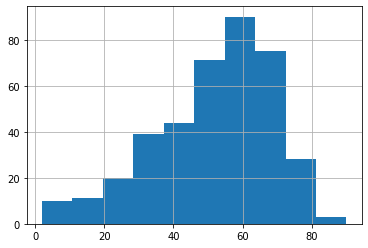

In [5]:
print(dataset['age'].describe())
print(dataset['age'].mode())
dataset['age'].hist()

mengisi missing value age dengan mean nya yaitu 51

In [6]:
dataset['age'] = dataset['age'].replace(np.nan,51)



---



**Melihat Distribusi Data Pada Kolom Hemoglobin**

count    348.000000
mean      12.526437
std        2.912587
min        3.100000
25%       10.300000
50%       12.650000
75%       15.000000
max       17.800000
Name: hemo, dtype: float64


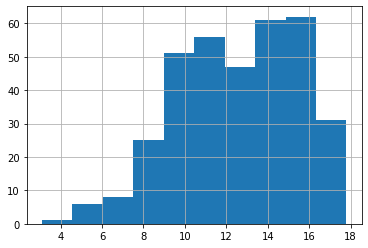

In [7]:
print(dataset['hemo'].describe())
dataset['hemo'].hist()



---



**Hubungan Anemia Dengan Hemoglobin (ditinjau dari data pengidap anemia atau tidak anemia)**

     hemo  ane
2     9.6  yes
3    11.2  yes
8    10.8  yes
9     9.5  yes
10    9.4  yes
15    7.6  yes
20    7.7  yes
22    9.8  yes
23    NaN  yes
25    9.9  yes
35   12.0  yes
37    9.7  yes
42    9.7  yes
49    9.7  yes
50    8.6  yes
52   10.9  yes
59    6.6  yes
63    7.5  yes
73    4.8  yes
75    8.1  yes
84    7.1  yes
95    NaN  yes
98    6.2  yes
103  10.2  yes
106   6.0  yes
113   NaN  yes
115  12.4  yes
122   6.0  yes
128   8.1  yes
130   8.2  yes
132   8.6  yes
139  11.1  yes
141   6.1  yes
145   8.0  yes
147   7.9  yes
151   9.6  yes
153   8.3  yes
154   8.4  yes
163   9.0  yes
166   NaN  yes
169   8.7  yes
171   8.7  yes
176   8.3  yes
178   9.8  yes
193   5.5  yes
196   8.1  yes
197   6.8  yes
201   7.9  yes
202   8.0  yes
203   8.5  yes
204   8.8  yes
208  12.3  yes
210   7.3  yes
235   7.9  yes
238   9.4  yes
242   9.4  yes
244  12.2  yes
246   8.6  yes
247   NaN  yes
249   3.1  yes
count    55.000000
mean      8.610909
std       1.870103
min       3.100000
25%      

id                 0
age                0
bp                 2
sg                15
al                15
su                15
rbc               29
pc                15
pcc                0
ba                 0
bgr               12
bu                 2
sc                 2
sod               14
pot               14
hemo               5
pcv               10
wc                18
rc                24
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64

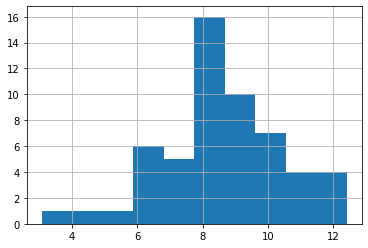

In [8]:
# Tinjau 1 : pengidap anemia
data_ane1 = dataset[dataset['ane']=='yes']        #data pengidap anemia
data_ane_hemo1 = data_ane1[['hemo','ane']]        #data pengidap anemia dan hemoglobinnya
data_ane1['hemo'].hist()                          #histogram pengidap anemia
print(data_ane_hemo1)
print(data_ane1['hemo'].describe())               #statistik hemoglobin pengidap anemia
print(data_ane_hemo1[data_ane_hemo1['hemo']>12])  #data pengidap anemia namun hemoglobin > 12
data_ane1.isnull().sum()

     hemo ane
0    15.4  no
1    11.3  no
4    11.6  no
5    12.2  no
6    12.4  no
..    ...  ..
395  15.7  no
396  16.5  no
397  15.8  no
398  14.2  no
399  15.8  no

[339 rows x 2 columns]
      id   age     bp     sg   al   su  ...   dm  cad appet   pe  ane  classification
1      1   7.0   50.0  1.020  4.0  0.0  ...   no   no  good   no   no             ckd
4      4  51.0   80.0  1.010  2.0  0.0  ...   no   no  good   no   no             ckd
11    11  63.0   70.0  1.010  3.0  0.0  ...  yes   no  poor  yes   no             ckd
12    12  68.0   70.0  1.015  3.0  1.0  ...  yes  yes  poor  yes   no             ckd
13    13  68.0   70.0    NaN  NaN  NaN  ...  yes  yes  poor  yes   no             ckd
..   ...   ...    ...    ...  ...  ...  ...  ...  ...   ...  ...  ...             ...
236  236  65.0   80.0    NaN  NaN  NaN  ...  yes  yes  good  yes   no             ckd
239  239  34.0   90.0  1.015  2.0  0.0  ...   no   no  good   no   no             ckd
240  240  65.0   70.0  1.015  1.0 

id                  0
age                 0
bp                 10
sg                 32
al                 31
su                 34
rbc               123
pc                 50
pcc                 4
ba                  4
bgr                32
bu                 17
sc                 15
sod                73
pot                74
hemo               47
pcv                61
wc                 88
rc                107
htn                 2
dm                  2
cad                 2
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

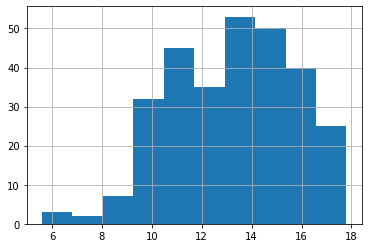

In [9]:
# Tinjau 2 : bukan pengidap anemia
data_ane2 = dataset[dataset['ane']=='no']   #data yang tidak anemia
data_ane_hemo2 = data_ane2[['hemo','ane']]  #data hemoglobin yang tidak anemia
print(data_ane_hemo2)       
data_ane3 = data_ane2[data_ane2['hemo']<12]     #data yang tidak anemia tetapi hemoglobin < 1
print(data_ane3)
print(data_ane2['hemo'].describe())       #statistik hemoglobin yang tidak anemia
data_ane2['hemo'].hist()      #histogram hemoglobin yang tidak anemia
print(data_ane3[['hemo','age','rbc','ane']])
data_ane2.isnull().sum()

mengisi missing value hemo berdasarkan mean nya yaitu 12.5

In [10]:
dataset['hemo']= dataset['hemo'].replace(np.nan, 12.5)



---



**Hubungan hemoglobin dan redbloodcell dengan LINEAR REGRESSION**

In [11]:
dataset_cc = dataset.dropna(axis = 0)
dataset_hemo_rc = dataset[['hemo','rc']]
corr = dataset_hemo_rc.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,hemo,rc
hemo,1.00,0.79
rc,0.79,1.00


In [12]:
dataset_hemo_rc1 = dataset.dropna(axis = 0, subset = ['hemo','rc'])
dataset_hemo_rc1 = dataset_hemo_rc1.loc[:,['hemo','rc']]
missing_rc= dataset['rc'].isnull()
hemo_misrc = pd.DataFrame(dataset['hemo'][missing_rc])

In [13]:
# linear regression
x = dataset_hemo_rc1[['hemo']]
y = dataset_hemo_rc1[['rc']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(x_train, y_train)
rc_pred = lm.predict(hemo_misrc)

mengisi missing data redbloodcell berdasarkan Regresi nya dengan Hemo

In [14]:
dataset.loc[dataset['rc'].isnull(),'rc'] = rc_pred



---



**Ada Keterhubungan htn dan bp**


In [15]:
dataset['htn']=dataset['htn'].replace(np.nan,'no')
data_bpno = dataset[dataset['htn']=='no'] 
data_bpyes = dataset[dataset['htn']=='yes'] 
print(data_bpno['bp'].describe())
print(data_bpyes['bp'].describe())
data_bpno['bp'] = data_bpno['bp'].replace(np.nan,70)
data_bpyes['bp'] = data_bpyes['bp'].replace(np.nan,80)
dataset = pd.concat([data_bpno,data_bpyes])

count    243.000000
mean      73.580247
std       10.753663
min       50.000000
25%       70.000000
50%       70.000000
75%       80.000000
max      120.000000
Name: bp, dtype: float64
count    145.000000
mean      81.310345
std       16.467779
min       50.000000
25%       70.000000
50%       80.000000
75%       90.000000
max      180.000000
Name: bp, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


mengisi missing value htn dengan no, dan
mengisi missing value bp dengan mediannya masing masing bpyes=80 dan bpno=70


---



**status missing value saat ini**

In [16]:
dataset.isnull().sum()

id                  0
age                 0
bp                  0
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo                0
pcv                71
wc                106
rc                  0
htn                 0
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64



---



**Ada Keterhubungan pcc dan pc**

In [17]:
dataset['pcc']=dataset['pcc'].replace(np.nan,'notpresent')
data_pcnormal = dataset[dataset['pcc']=='notpresent']
data_pcnormal['pc'] = data_pcnormal['pc'].replace(np.nan,'normal')
data_pcabnormal = dataset[dataset['pcc']=='present']
data_pcabnormal['pc'] = data_pcabnormal['pc'].replace(np.nan, 'abnormal')
dataset = pd.concat([data_pcnormal,data_pcabnormal])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


mengisi missing value pcc dengan no, dan mengisi missing value pc (berdasarkan pcc, [notpresent=normal]; [present=abnormal])


---



**Melihat Kolom dm, cad, appet, pe, ane**

In [18]:
dataset['dm']=dataset['dm'].replace(np.nan,'no')
dataset['cad']=dataset['cad'].replace(np.nan,'no')
dataset['appet']=dataset['appet'].replace(np.nan,'good')
dataset['pe']=dataset['pe'].replace(np.nan,'no')
dataset['ane']=dataset['ane'].replace(np.nan,'no')

mengisi missing value dm dengan no, mengisi missing value cad dengan no, mengisi missing value appet dengan good, mengisi missing value pe dengan no, dan mengisi missing value ane dengan no


---



**Ada Keterhubungan bgr dengan su**

In [19]:
datasu_notckd = dataset[dataset['classification']=='notckd']
datasu_ckd = dataset[dataset['classification']=='ckd']

datasu_notckd['su'] = datasu_notckd['su'].replace(np.nan, 0)

dataset = pd.concat([datasu_notckd,datasu_ckd])

data_su0 = dataset[dataset['su']==0]
data_su1 = dataset[dataset['su']==1]
data_su2 = dataset[dataset['su']==2]
data_su3 = dataset[dataset['su']==3]
data_su4 = dataset[dataset['su']==4]
data_su5 = dataset[dataset['su']==5]
data_su6 = dataset[dataset['su'].isnull()]

print(data_su0['bgr'].mean())
print(data_su1['bgr'].mean())
print(data_su2['bgr'].mean())
print(data_su3['bgr'].mean())
print(data_su4['bgr'].mean())
print(data_su5['bgr'].mean())
print(datasu_ckd['bgr'].mean())

data_su0['bgr']=data_su0['bgr'].replace(np.nan,122)
data_su1['bgr']=data_su1['bgr'].replace(np.nan,213)
data_su2['bgr']=data_su2['bgr'].replace(np.nan,256)
data_su3['bgr']=data_su3['bgr'].replace(np.nan,269)
data_su4['bgr']=data_su4['bgr'].replace(np.nan,302)

dataset = pd.concat([data_su0,data_su1,data_su2,data_su3,data_su4,data_su5,data_su6])
dataset['bgr'] = dataset['bgr'].replace(np.nan,172)

121.79087452471482
213.6153846153846
255.8
269.0
302.4166666666667
394.3333333333333
175.41981132075472


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

mengisi missing value bgr dengan mean nya dilihat dari su


---



**status missing value saat ini**

In [20]:
dataset.isnull().sum()

id                  0
age                 0
bp                  0
sg                 47
al                 46
su                 44
rbc               152
pc                  0
pcc                 0
ba                  4
bgr                 0
bu                 19
sc                 17
sod                87
pot                88
hemo                0
pcv                71
wc                106
rc                  0
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64



---



**Melihat Kolom Dari bu, sc, sod, pot, dan sg**

In [21]:
print(dataset['bu'].mean())
print(dataset['sc'].mean())
print(dataset['sod'].mean())
print(dataset['pot'].mean())
print(dataset['sg'].mean())

57.4257217847769
3.0724543080939943
137.52875399361022
4.6272435897435935
1.0174079320113267


In [22]:
dataset['bu']=dataset['bu'].replace(np.nan, 57)
dataset['sc']=dataset['sc'].replace(np.nan, 3.1 )
dataset['sod']=dataset['sod'].replace(np.nan,138 )
dataset['pot']=dataset['pot'].replace(np.nan, 4.6)
dataset['sg']=dataset['sg'].replace(np.nan,1.017 )
dataset['ba']=dataset['ba'].replace(np.nan,'notpresent' )

mengisi missing value masing masing kolom dengan meannya


---



**status missing value saat ini**

In [23]:
dataset.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                 46
su                 44
rbc               152
pc                  0
pcc                 0
ba                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                71
wc                106
rc                  0
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

---

**Melihat Distribusi Data whitebloodcell (wc)**

count      294.000000
mean      8406.122449
std       2944.474190
min       2200.000000
25%       6500.000000
50%       8000.000000
75%       9800.000000
max      26400.000000
Name: wc, dtype: float64


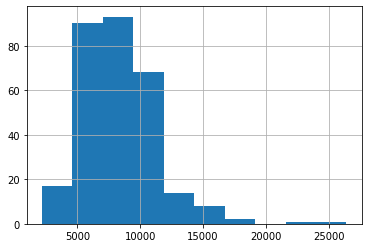

In [24]:
print(dataset['wc'].describe())
dataset['wc'].hist()

In [25]:
dataset['wc'] = dataset['wc'].replace(np.nan, 8)

mengisi missing data wc berdasarkan mediannya


---



**status missing value saat ini**

In [26]:
dataset.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                 46
su                 44
rbc               152
pc                  0
pcc                 0
ba                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                71
wc                  0
rc                  0
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64



---



**Hubungan hemoglobin dan redbloodcell dengan LINEAR REGRESSION**

In [27]:
dataset_cc = dataset.dropna(axis = 0)
dataset_hemo_pcv = dataset[['hemo','pcv']]
corr1 = dataset_hemo_pcv.corr()
corr1.style.background_gradient(cmap='coolwarm').set_precision(2)

,hemo,pcv
hemo,1.00,0.89
pcv,0.89,1.00


In [28]:
dataset_hemo_pcv = dataset.dropna(axis = 0, subset = ['hemo','pcv'])
dataset_hemo_pcv = dataset_hemo_pcv.loc[:,['hemo','pcv']]
missing_pcv = dataset['pcv'].isnull()
hemo_mispcv = pd.DataFrame(dataset['hemo'][missing_pcv])

In [29]:
x1 = dataset_hemo_pcv[['hemo']]
y1 = dataset_hemo_pcv[['pcv']]
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = 0.2, random_state =101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(x1_train, y1_train)
pcv_pred = lm.predict(hemo_mispcv)

mengisi missing data pcv berdasarkan Regresi nya dengan Hemo

In [30]:
dataset.loc[dataset['pcv'].isnull(),'pcv'] = pcv_pred



---



**status missing value saat ini**

In [31]:
dataset.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                 46
su                 44
rbc               152
pc                  0
pcc                 0
ba                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64



---



**Menghapus Sisa Missing Value Yang Masih Ada**

In [32]:
dataset = dataset.drop(['rbc'], axis=1)

menghapus kolom rbc

In [33]:
dataset = dataset.dropna(axis=0)

menghapus baris yang mengandung missing value


---



**status missing value & baris kolom saat ini**

In [34]:
dataset.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [35]:
dataset.shape

(351, 25)

jumlah baris saat ini 351 data, dan 25 kolom feature


---



**Mengecek Duplikasi Data**

In [36]:
dataset.duplicated().sum()

0



---



**Mengecek & Merapihkan Data Typo**

In [37]:
dataset['appet']=dataset['appet'].replace('poof','poor')
dataset['appet']=dataset['appet'].replace('goof','good')

print(pd.unique(dataset['appet']))
print(pd.unique(dataset['cad']))
dataset['cad']=dataset['cad'].replace('no ','no')
print(pd.unique(dataset['dm']))
print(pd.unique(dataset['htn']))
print(pd.unique(dataset['pe']))
print(pd.unique(dataset['ane']))
print(pd.unique(dataset['pc']))
print(pd.unique(dataset['pcc']))
print(pd.unique(dataset['ba']))

['good' 'poor']
['no' 'yes' 'no ']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['normal' 'abnormal']
['notpresent' 'present']
['notpresent' 'present']




---



**Encoding Kolom Data Kategorik**

In [38]:
from sklearn.preprocessing import LabelEncoder
label_1 = LabelEncoder()
dataset['pc'] = label_1.fit_transform(dataset['pc'])
label_2 = LabelEncoder()
dataset['pcc'] = label_2.fit_transform(dataset['pcc'])
label_3 = LabelEncoder()
dataset['ba'] = label_3.fit_transform(dataset['ba'])
label_4 = LabelEncoder()
dataset['htn'] = label_4.fit_transform(dataset['htn'])
label_5 = LabelEncoder()
dataset['dm'] = label_5.fit_transform(dataset['dm'])
label_6 = LabelEncoder()
dataset['cad'] = label_6.fit_transform(dataset['cad'])
label_8 = LabelEncoder()
dataset['pe'] = label_8.fit_transform(dataset['pe'])
label_9 = LabelEncoder()
dataset['ane'] = label_9.fit_transform(dataset['ane'])
label_10 = LabelEncoder()
dataset['appet'] = label_9.fit_transform(dataset['appet'])

dataset['classification']=dataset['classification'].replace('ckd',1)
dataset['classification']=dataset['classification'].replace('notckd',0)

encoding data kategorik untuk persiapan pemodelan


---



**Mengecek Ulang Kembali Data**

In [39]:
dataset.head()

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
250,250,40.0,80.0,1.025,0.0,0.0,1,0,0,140.0,10.0,1.2,135.0,5.0,15.0,48.0,10400.0,4.5,0,0,0,0,0,0,0
251,251,23.0,80.0,1.025,0.0,0.0,1,0,0,70.0,36.0,1.0,150.0,4.6,17.0,52.0,9800.0,5.0,0,0,0,0,0,0,0
252,252,45.0,80.0,1.025,0.0,0.0,1,0,0,82.0,49.0,0.6,147.0,4.4,15.9,46.0,9100.0,4.7,0,0,0,0,0,0,0
253,253,57.0,80.0,1.025,0.0,0.0,1,0,0,119.0,17.0,1.2,135.0,4.7,15.4,42.0,6200.0,6.2,0,0,0,0,0,0,0
254,254,51.0,60.0,1.025,0.0,0.0,1,0,0,99.0,38.0,0.8,135.0,3.7,13.0,49.0,8300.0,5.2,0,0,0,0,0,0,0


In [40]:
dataset.sort_values(by=['id'],inplace=True)
dataset.head()

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,0,0,121.0,36.0,1.2,138.0,4.6,15.4,44.0,7800.0,5.200000,1,1,0,0,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,1,0,0,122.0,18.0,0.8,138.0,4.6,11.3,38.0,6000.0,4.187400,0,0,0,0,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,0,0,423.0,53.0,1.8,138.0,4.6,9.6,31.0,7500.0,3.702609,0,1,0,1,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.900000,1,0,0,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,0,0,106.0,26.0,1.4,138.0,4.6,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0,1


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              351 non-null    int64  
 1   age             351 non-null    float64
 2   bp              351 non-null    float64
 3   sg              351 non-null    float64
 4   al              351 non-null    float64
 5   su              351 non-null    float64
 6   pc              351 non-null    int64  
 7   pcc             351 non-null    int64  
 8   ba              351 non-null    int64  
 9   bgr             351 non-null    float64
 10  bu              351 non-null    float64
 11  sc              351 non-null    float64
 12  sod             351 non-null    float64
 13  pot             351 non-null    float64
 14  hemo            351 non-null    float64
 15  pcv             351 non-null    float64
 16  wc              351 non-null    float64
 17  rc              351 non-null    flo

In [42]:
dataset.shape

(351, 25)

In [43]:
dataset

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,0,0,121.0,36.0,1.2,138.0,4.6,15.4,44.0,7800.0,5.200000,1,1,0,0,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,1,0,0,122.0,18.0,0.8,138.0,4.6,11.3,38.0,6000.0,4.187400,0,0,0,0,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,0,0,423.0,53.0,1.8,138.0,4.6,9.6,31.0,7500.0,3.702609,0,1,0,1,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.900000,1,0,0,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,0,0,106.0,26.0,1.4,138.0,4.6,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.900000,0,0,0,0,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.200000,0,0,0,0,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.400000,0,0,0,0,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.900000,0,0,0,0,0,0,0


**data sudah siap dilakukan EDA / Exploratory Data Analysis**


---




---



# Exploratory Data Analysis (EDA)

In [53]:
dataset['classification']=dataset['classification'].replace(1 ,'Pengidap PGK')
dataset['classification']=dataset['classification'].replace(0, 'Bukan Pengidap PGK')

In [54]:
dataset.head()

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,0,0,121.0,36.0,1.2,138.0,4.6,15.4,44.0,7800.0,5.200000,1,1,0,0,0,0,Pengidap PGK
1,1,7.0,50.0,1.020,4.0,0.0,1,0,0,122.0,18.0,0.8,138.0,4.6,11.3,38.0,6000.0,4.187400,0,0,0,0,0,0,Pengidap PGK
2,2,62.0,80.0,1.010,2.0,3.0,1,0,0,423.0,53.0,1.8,138.0,4.6,9.6,31.0,7500.0,3.702609,0,1,0,1,0,1,Pengidap PGK
3,3,48.0,70.0,1.005,4.0,0.0,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.900000,1,0,0,1,1,1,Pengidap PGK
4,4,51.0,80.0,1.010,2.0,0.0,1,0,0,106.0,26.0,1.4,138.0,4.6,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0,Pengidap PGK


[Text(0, 0.5, 'Banyak Penderita'),
 Text(0.5, 0, ' '),
 Text(0.5, 1.0, 'Jumlah Penderita PGK dan Non-PGK')]

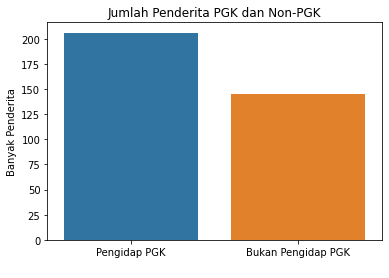

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
bx = sns.countplot(x="classification", data=dataset)
bx.set(xlabel=' ', ylabel='Banyak Penderita', title='Jumlah Penderita PGK dan Non-PGK')

Dapat dilihat dari visualisasi, dari dataset 351 data, **persentase data pengidap pgk lebih banyak dari persentase yang bukan pengidap pgk**, ada sekitar 200an data orang yang mengidap PGK



---



**Variabel Classification dengan Variabel Numerik**

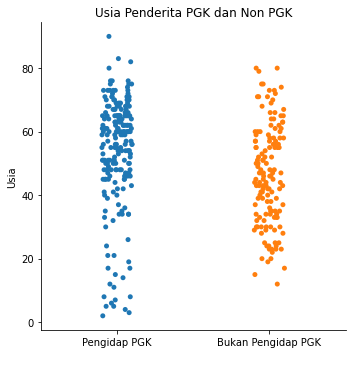

In [56]:
p= sns.catplot(x="classification", y="age", data=dataset)
p.set(xlabel=' ', ylabel='Usia', title='Usia Penderita PGK dan Non PGK')

Dari visualisasi dapat terlihat, **usia pengidap PGK kebanyakan berada di range usia 40-80 tahun**, yang mana ini mengindikasi variabel age merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



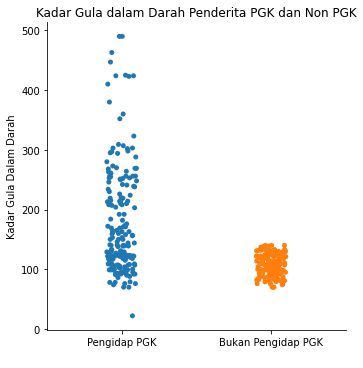

In [57]:
p = sns.catplot(x="classification", y="bgr", data=dataset)
p.set(xlabel=' ', ylabel='Kadar Gula Dalam Darah', title='Kadar Gula dalam Darah Penderita PGK dan Non PGK')

Dari visualisasi dapat terlihat, **kadar glukosa dalam darah pada pengidap PGK bervariasi dan juga ada banyak yang kadar glukosanya melebihi orang yang bukan pengidap PGK**, yang mana ini mengindikasi variabel bgr merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



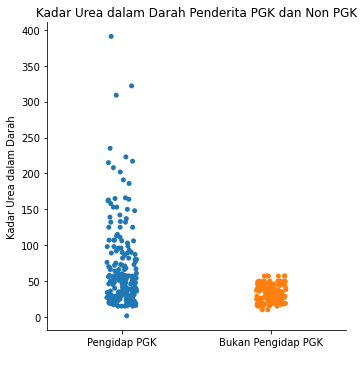

In [58]:
p = sns.catplot(x="classification", y="bu", data=dataset)
p.set(xlabel=' ', ylabel='Kadar Urea dalam Darah', title='Kadar Urea dalam Darah Penderita PGK dan Non PGK')

Dari visualisasi dapat terlihat, **kadar urea dalam darah pada pengidap PGK bervariasi dan juga ada beberapa yang kadar ureanya melebihi orang yang bukan pengidap PGK**, yang mana ini mengindikasi variabel bu merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



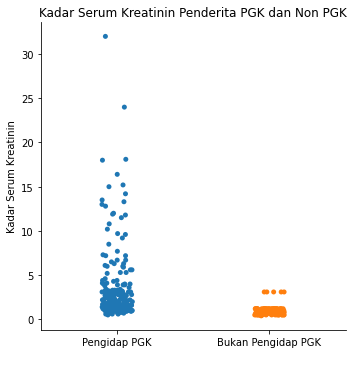

In [59]:
p = sns.catplot(x="classification", y="sc", data=dataset)
p.set(xlabel=' ', ylabel='Kadar Serum Kreatinin', title='Kadar Serum Kreatinin Penderita PGK dan Non PGK')

Dari visualisasi dapat terlihat, **kadar serum kreatinin pada pengidap PGK bervariasi dan juga ada beberapa yang kadar serum kreatininnya melebihi orang yang bukan pengidap PGK**, yang mana ini mengindikasi variabel sc merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



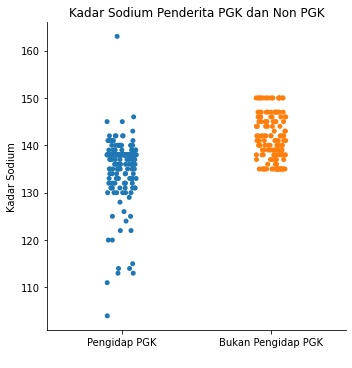

In [60]:
p = p= sns.catplot(x="classification", y="sod", data=dataset)
p.set(xlabel=' ', ylabel='Kadar Sodium', title='Kadar Sodium Penderita PGK dan Non PGK')

Dapat dilihat daru visualisasi, **rata rata kadar sodium penderita PGK relatif lebih rendah dari rata rata kadar sodium yang bukan penderita PGK**, yang mana ini mengdindikasi variabel sod merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



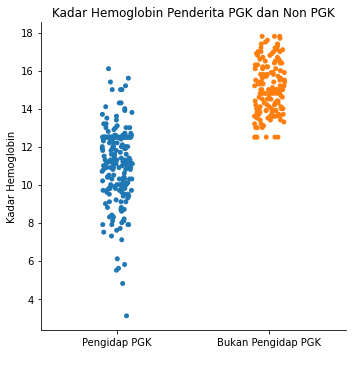

In [61]:
p= sns.catplot(x="classification", y="hemo", data=dataset)
p.set(xlabel=' ', ylabel='Kadar Hemoglobin', title='Kadar Hemoglobin Penderita PGK dan Non PGK')

Dapat dilihat dari visualisasi, **rata rata kadar hemoglobin penderita PGK relatif lebih rendah dari rata rata kadar hemoglobin yang bukan penderita PGK**, yang mana ini mengdindikasi variabel hemo merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



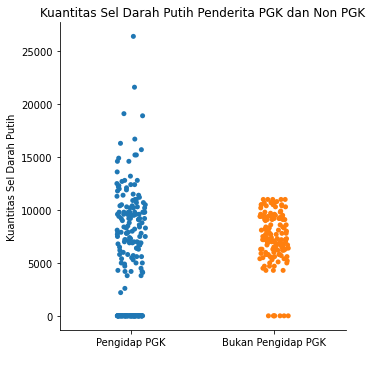

In [62]:
p= sns.catplot(x="classification", y="wc", data=dataset)
p.set(xlabel=' ', ylabel='Kuantitas Sel Darah Putih', title='Kuantitas Sel Darah Putih Penderita PGK dan Non PGK')

Dari visualisasi dapat terlihat, **kuantitas sel darah putih pada pengidap PGK bervariasi dan juga ada beberapa yang kuantitas sel darah putihnya melebihi orang yang bukan pengidap PGK**, yang mana ini mengindikasi variabel wc merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



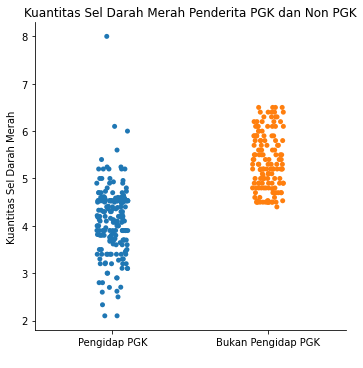

In [63]:
p= sns.catplot(x="classification", y="rc", data=dataset)
p.set(xlabel=' ', ylabel='Kuantitas Sel Darah Merah', title='Kuantitas Sel Darah Merah Penderita PGK dan Non PGK')

Dapat dilihat daru visualisasi, **rata rata banyaknya sel darah merah penderita PGK relatif lebih rendah dari rata rata banyaknya sel darah merah yang bukan penderita PGK**, yang mana ini mengdindikasi variabel rc merupakan salah satu faktor penyebab orang terdiagnosis PGK



---



**Variabel Classification dengan Variabel Kategorik**

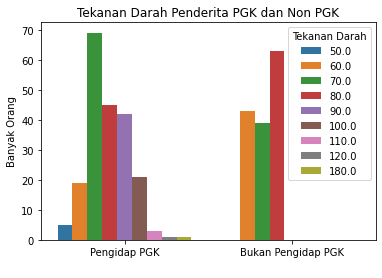

In [64]:
ax = sns.countplot(x="classification", hue="bp", data=dataset)
ax.set(xlabel=' ', ylabel='Banyak Orang', title='Tekanan Darah Penderita PGK dan Non PGK')
ax.legend(title = "Tekanan Darah" , loc = 1)

Dari visualisasi dapat terlihat, **tekanan darah pada pengidap PGK bervariasi mulai dari yang rendah-normal-tinggi dibandingkan dengan orang yang bukan pengidap PGK yang semuanya memiliki tekanan darah normal**, yang mana ini mengindikasi variabel bp merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



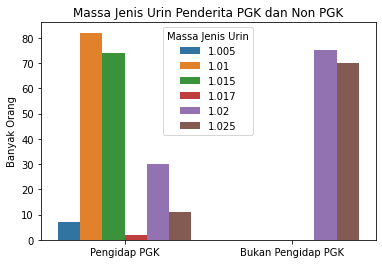

In [65]:
bx = sns.countplot(x="classification", hue="sg", data=dataset)
bx.set(xlabel=' ', ylabel='Banyak Orang', title='Massa Jenis Urin Penderita PGK dan Non PGK')
bx.legend(title = "Massa Jenis Urin", loc = 9)

Dari visualisasi dapat terlihat, **massa jenis urin pada pengidap PGK bervariasi apabila dibandingkan dengan orang yang bukan pengidap PGK yang semuanya memiliki nilai sg 1.02 atau 1.025**, yang mana ini mengindikasi variabel sg merupakan salah satu faktor penyebab orang terdiagnosis PGK


---




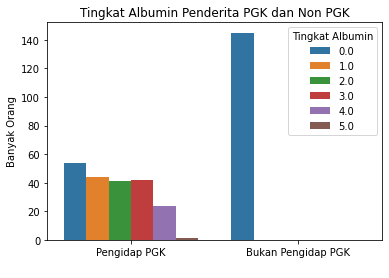

In [66]:
bx = sns.countplot(x="classification", hue="al", data=dataset)
bx.set(xlabel=' ', ylabel='Banyak Orang', title='Tingkat Albumin Penderita PGK dan Non PGK')
bx.legend(title = "Tingkat Albumin", loc = 1)

Dari visualisasi dapat terlihat, **tingkat albumin pada pengidap PGK bervariasi apabila dibandingkan dengan orang yang bukan pengidap PGK yang semuanya berada di tingkat 0**, yang mana ini mengindikasi variabel al merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



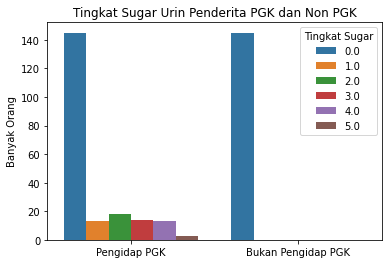

In [67]:
bx = sns.countplot(x="classification", hue="su", data=dataset)
bx.set(xlabel=' ', ylabel='Banyak Orang', title='Tingkat Sugar Urin Penderita PGK dan Non PGK')
bx.legend(title = "Tingkat Sugar", loc = 1)

Dari visualisasi dapat terlihat, **tingkat sugar pada pengidap PGK bervariasi apabila dibandingkan dengan orang yang bukan pengidap PGK yang semuanya berada di tingkat 0**, yang mana ini mengindikasi variabel su merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



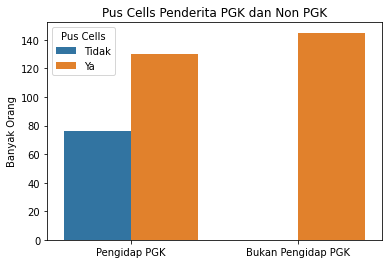

In [68]:
bx = sns.countplot(x="classification", hue="pc", data=dataset)
bx.set(xlabel=' ', ylabel='Banyak Orang', title='Pus Cells Penderita PGK dan Non PGK')
bx.legend(labels=["Tidak","Ya"], title = "Pus Cells")

dari visualisasi dapat terlihat, **jumlah orang yang urinnya bernanah pada penderita PGK lebih banyak dari jumlah orang tidak**, yang mana ini mengindikasi variabel pc merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



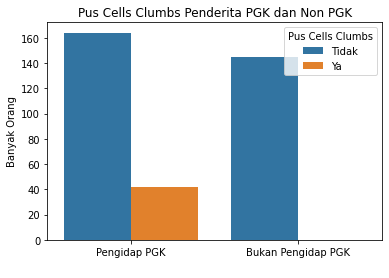

In [69]:
bx = sns.countplot(x="classification", hue="pcc", data=dataset)
bx.set(xlabel=' ', ylabel='Banyak Orang', title='Pus Cells Clumbs Penderita PGK dan Non PGK')
bx.legend(labels=["Tidak","Ya"], title = "Pus Cells Clumbs", loc = 1)

dari visualisasi dapat terlihat, **jumlah orang yang urinnya bernanah dan menggumpal pada penderita PGK lebih sedikit dari jumlah yang tidak, yang berarti dari total orang yang urinnya bernanah hanya sebagian yang nanahnya menggumpal**, yang mana ini mengindikasi variabel pcc merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



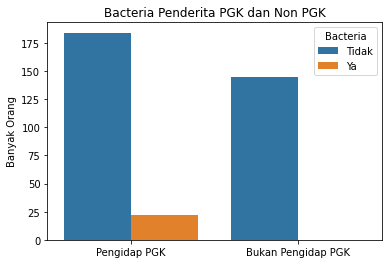

In [70]:
bx = sns.countplot(x="classification", hue="ba", data=dataset)
bx.set(xlabel=' ', ylabel='Banyak Orang', title='Bacteria Penderita PGK dan Non PGK')
bx.legend(labels=["Tidak","Ya"], title = "Bacteria", loc = 1)

dari visualisasi dapat terlihat, **jumlah orang memiliki bacteria pada penderita PGK lebih sedikit dari jumlah yang tidak**, yang mana ini mengindikasi variabel ba merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



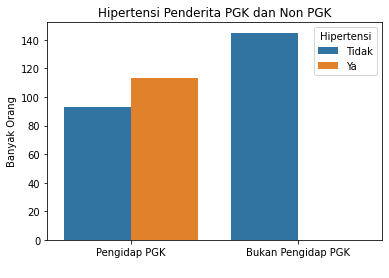

In [71]:
bx = sns.countplot(x="classification", hue="htn", data=dataset)
bx.set(xlabel=' ', ylabel='Banyak Orang', title='Hipertensi Penderita PGK dan Non PGK')
bx.legend(labels=["Tidak","Ya"], title = "Hipertensi", loc = 1)

dari visualisasi dapat terlihat, **jumlah orang dengan hipertensi pada penderita PGK lebih banyak dari jumlah yang tidak**, yang mana ini mengindikasi variabel htn merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



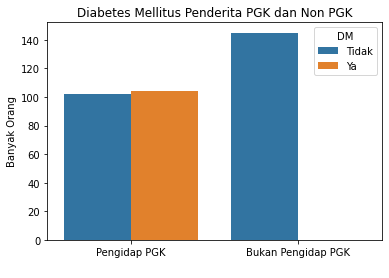

In [72]:
bx = sns.countplot(x="classification", hue="dm", data=dataset)
bx.set(xlabel=' ', ylabel='Banyak Orang', title='Diabetes Mellitus Penderita PGK dan Non PGK')
bx.legend(labels=["Tidak","Ya"], title = "DM", loc = 1)

dari visualisasi dapat terlihat, **jumlah orang dengan diabetes mellitus pada penderita PGK lebih banyak dari jumlah yang tidak**, yang mana ini mengindikasi variabel dm merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



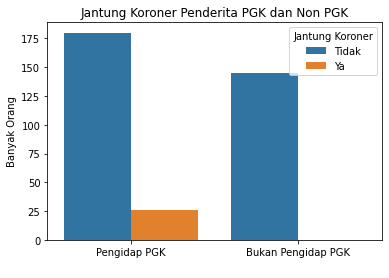

In [73]:
bx = sns.countplot(x="classification", hue="cad", data=dataset)
bx.set(xlabel=' ', ylabel='Banyak Orang', title='Jantung Koroner Penderita PGK dan Non PGK')
bx.legend(labels=["Tidak","Ya"], title = "Jantung Koroner", loc = 1)

dari visualisasi dapat terlihat, **jumlah orang dengan penyakit jantung koroner pada penderita PGK lebih sedikit dari jumlah yang tidak** , yang mana ini mengindikasi variabel cad merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



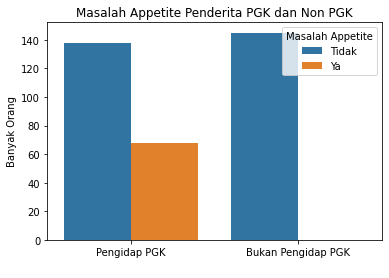

In [74]:
bx = sns.countplot(x="classification", hue="appet", data=dataset)
bx.set(xlabel=' ', ylabel='Banyak Orang', title='Masalah Appetite Penderita PGK dan Non PGK')
bx.legend(labels=["Tidak","Ya"], title = "Masalah Appetite", loc = 1)

dari visualisasi dapat terlihat, **jumlah orang yang bermasalah dengan nafsu makan pada penderita PGK lebih sedikit dari jumlah yang tidak** , yang mana ini mengindikasi variabel appet merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



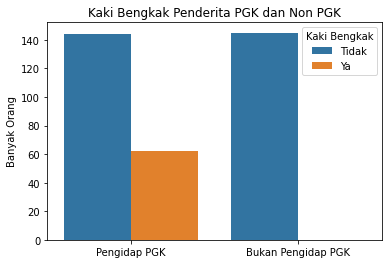

In [75]:
bx = sns.countplot(x="classification", hue="pe", data=dataset)
bx.set(xlabel=' ', ylabel='Banyak Orang', title='Kaki Bengkak Penderita PGK dan Non PGK')
bx.legend(labels=["Tidak","Ya"], title = "Kaki Bengkak", loc = 1)

dari visualisasi dapat terlihat, **jumlah orang dengan kaki bengkak pada penderita PGK lebih sedikit dari jumlah yang tidak** , yang mana ini mengindikasi variabel pe merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



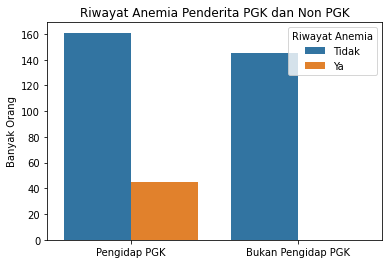

In [76]:
bx = sns.countplot(x="classification", hue="ane", data=dataset)
bx.set(xlabel=' ', ylabel='Banyak Orang', title='Riwayat Anemia Penderita PGK dan Non PGK')
bx.legend(labels=["Tidak","Ya"], title = "Riwayat Anemia", loc = 1)

dari visualisasi dapat terlihat, **jumlah orang dengan riwayat anemia pada penderita PGK lebih sedikit dari jumlah yang tidak** , yang mana ini mengindikasi variabel ane merupakan salah satu faktor penyebab orang terdiagnosis PGK


---



**Variabel Lainnya**

<Figure size 1440x360 with 0 Axes>

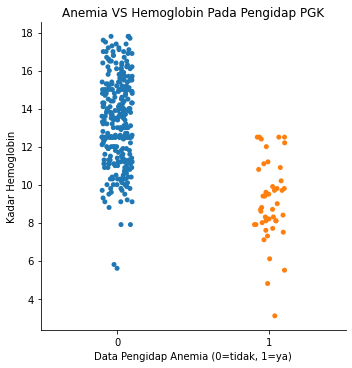

<Figure size 1440x360 with 0 Axes>

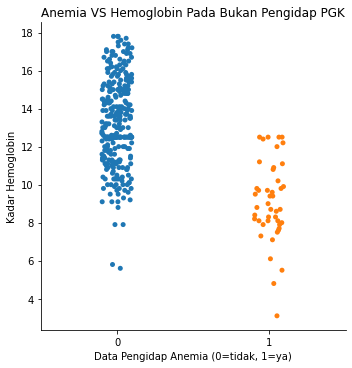

In [77]:
pgk_arr = dataset["classification"].unique()
for pgk in pgk_arr:
    mask = dataset["classification"] == pgk
    plt.figure(figsize=(20, 5))
    sns.catplot(x = "ane", y = "hemo", data = dataset)
    plt.title("Anemia VS Hemoglobin Pada {}".format(pgk))
    plt.xlabel("Data Pengidap Anemia (0=tidak, 1=ya)")
    plt.ylabel("Kadar Hemoglobin")
    plt.show()

Dapat dilihat dari visualisasi, **orang dengan anemia memiliki rata rata kadar hemoglobin yang relatif lebih rendah dibanding dengan yang tidak anemia, dan berlaku pada penderita PGK maupun non-PGK**



---



<Figure size 1440x360 with 0 Axes>

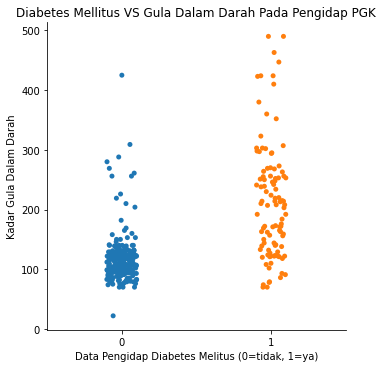

<Figure size 1440x360 with 0 Axes>

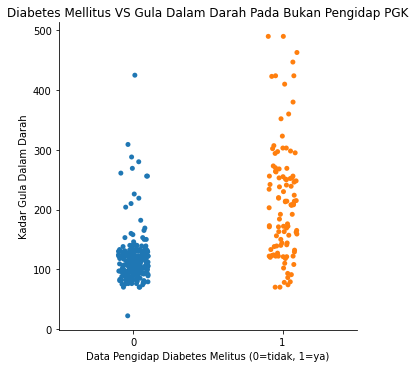

In [78]:
pgk_arr = dataset["classification"].unique()
for pgk in pgk_arr:
    mask = dataset["classification"] == pgk
    plt.figure(figsize=(20, 5))
    sns.catplot(x = "dm", y = "bgr", data = dataset)
    plt.title("Diabetes Mellitus VS Gula Dalam Darah Pada {}".format(pgk))
    plt.xlabel("Data Pengidap Diabetes Melitus (0=tidak, 1=ya)")
    plt.ylabel("Kadar Gula Dalam Darah")
    plt.show()

Dapat dilihat dari visualisasi, **orang dengan DM memiliki kadar Gula yang bervariasi yang relatif lebih tinggi dibanding dengan yang tidak DM, dan berlaku pada penderita PGK maupun non-PGK**



---



<Figure size 1440x360 with 0 Axes>

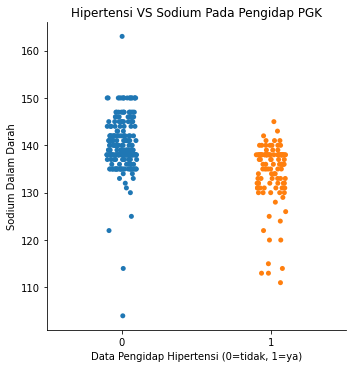

<Figure size 1440x360 with 0 Axes>

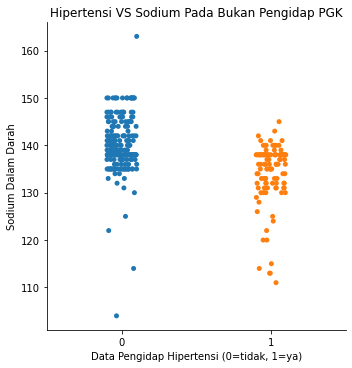

In [79]:
pgk_arr = dataset["classification"].unique()
for pgk in pgk_arr:
    mask = dataset["classification"] == pgk
    plt.figure(figsize=(20, 5))
    sns.catplot(x = "htn", y = "sod", data = dataset)
    plt.title("Hipertensi VS Sodium Pada {}".format(pgk))
    plt.xlabel("Data Pengidap Hipertensi (0=tidak, 1=ya)")
    plt.ylabel("Sodium Dalam Darah")
    plt.show()

Dapat dilihat dari visualisasi, **orang dengan Hipertensi memiliki rata rata kadar sodium yang relatif lebih rendah dibanding dengan yang tidak Hipertensi, dan berlaku pada penderita PGK maupun non-PGK**



---



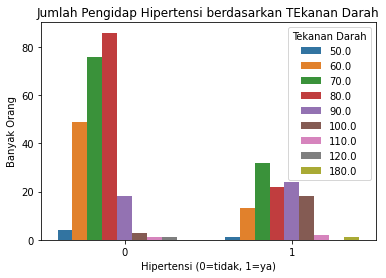

In [80]:
p = sns.countplot(x = "htn", hue = "bp", data = dataset)
p.set(xlabel='Hipertensi (0=tidak, 1=ya)', ylabel='Banyak Orang', title='Jumlah Pengidap Hipertensi berdasarkan TEkanan Darah')
p.legend(title = "Tekanan Darah", loc = 1)

Dari visualisasi dapat terlihat, **Orang yang tidak Hipertensi Kebanyakan memiliki Tekanan Darah Normal (60-90), dibanding dengan orang dengan hipertensi yang tekanan darahnya bervariasi dari rendah-normal-tinggi**




---


---



# Seleksi Fitur

karena fitur yang dimodelkan ada 25, akan dilakukan seleksi fitur

In [81]:
dataset['classification']=dataset['classification'].replace('Pengidap PGK', 1)
dataset['classification']=dataset['classification'].replace('Bukan Pengidap PGK', 0)

In [82]:
#Inisialisasi variabel
Y = dataset.classification
X = dataset.drop(columns = ['classification'], axis = 1)

In [83]:
def processSubset(feature_set):
    model = sm.OLS(Y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - Y) ** 2).sum()
    MSE = RSS / (X.shape[0]-2)
    Cp = (1/X.shape[0]) * (RSS + 2 * len(feature_set) * MSE)
    return {"model":regr, "Cp":Cp}



---



**Running Time**

In [84]:
def backward(predictors):
    
    t_a = time.time()
    hasil = []
    for col in itertools.combinations(predictors, len(predictors)-1):
        hasil.append(processSubset(col))
    models = pd.DataFrame(hasil)
    # Pilih model dengan nilai Cp paling kecil
    best_model = models.loc[models['Cp'].argmin()]
    t_b = time.time()
    print("Memproses ", models.shape[0], "model dengan", len(predictors)-1, "predictors dalam", (t_b-t_a), "detik.")
    return best_model

In [85]:
model_bwd = pd.DataFrame(columns=["Cp", "model"], index = range(1,len(X.columns)))

t_a = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    model_bwd.loc[len(predictors)-1] = backward(predictors)[0]
    predictors = model_bwd.loc[len(predictors)-1]["model"].model.exog_names
    
t_b = time.time()
print("\nTotal waktu yang dibutuhkan:", (t_b-t_a), "detik.")

Memproses  24 model dengan 23 predictors dalam 0.19772887229919434 detik.
Memproses  23 model dengan 22 predictors dalam 0.14497113227844238 detik.
Memproses  22 model dengan 21 predictors dalam 0.1621870994567871 detik.
Memproses  21 model dengan 20 predictors dalam 0.14625239372253418 detik.
Memproses  20 model dengan 19 predictors dalam 0.1287705898284912 detik.
Memproses  19 model dengan 18 predictors dalam 0.1271989345550537 detik.
Memproses  18 model dengan 17 predictors dalam 0.11720633506774902 detik.
Memproses  17 model dengan 16 predictors dalam 0.09945273399353027 detik.
Memproses  16 model dengan 15 predictors dalam 0.06540608406066895 detik.
Memproses  15 model dengan 14 predictors dalam 0.06347227096557617 detik.
Memproses  14 model dengan 13 predictors dalam 0.052186012268066406 detik.
Memproses  13 model dengan 12 predictors dalam 0.08483052253723145 detik.
Memproses  12 model dengan 11 predictors dalam 0.07205557823181152 detik.
Memproses  11 model dengan 10 predictors



---



**Pemilihan Model**

In [86]:
def backward(predictors):

    hasil = []
    for col in itertools.combinations(predictors, len(predictors)-1):
        hasil.append(processSubset(col))
    models = pd.DataFrame(hasil)
    # Pilih model dengan nilai Cp paling kecil
    best_model = models.loc[models['Cp'].argmin()]
    return best_model

In [87]:
model_bwd = pd.DataFrame(columns=["Cp", "model"], index = range(1,len(X.columns)))
 
predictors = X.columns
while(len(predictors) > 1):  
    model_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = model_bwd.loc[len(predictors)-1]["model"].model.exog_names 
 
    print('\nModel yang dipilih dengan {} variabel:'.format(len(predictors)))
    print(pd.DataFrame({'variable': predictors, 'Koefisien': list(model_bwd.loc[len(predictors), "model"].params)}))


Model yang dipilih dengan 23 variabel:
   variable  Koefisien
0        id  -0.002226
1       age   0.000287
2        bp   0.002022
3        sg   1.741243
4        al   0.042628
5        su   0.002977
6        pc   0.027620
7       pcc  -0.020335
8        ba   0.062352
9       bgr   0.000552
10       bu  -0.000575
11       sc   0.006019
12      sod  -0.001437
13      pot  -0.003122
14     hemo  -0.038698
15      pcv  -0.003377
16       wc  -0.000007
17       rc  -0.033279
18      htn   0.007495
19       dm   0.069054
20      cad  -0.090432
21       pe   0.022608
22      ane  -0.077066

Model yang dipilih dengan 22 variabel:
   variable  Koefisien
0        id  -0.002227
1       age   0.000285
2        bp   0.002045
3        sg   1.729240
4        al   0.042674
5        pc   0.028546
6       pcc  -0.020160
7        ba   0.063080
8       bgr   0.000580
9        bu  -0.000587
10       sc   0.006225
11      sod  -0.001405
12      pot  -0.002975
13     hemo  -0.038654
14      pcv  -0.003355




---



**Bandingkan RSS Model Yang Telah Dipilih**

In [88]:
fitur23 = ['age', 'bp', 'sg', 'al', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane']

In [89]:
pd.set_option('max_colwidth', None)
hasil = pd.DataFrame(columns=["Cp", "model"], index = range(1,len(X.columns)))
predictors = X.columns
model23 = backward(predictors)
fitur = []

while(len(predictors) > 1):
    hasil.loc[len(predictors)-1] = backward(predictors)
    predictors = hasil.loc[len(predictors)-1]["model"].model.exog_names
    fitur.append(predictors)
fitur.reverse()
fitur.append(fitur23)
RS = list(hasil['Cp'])
RS.append(model23['Cp'])
p = pd.DataFrame({'Cp': RS,'Fitur': fitur},index=range(24))

In [90]:
p

,Cp,Fitur
0,0.246226,[sg]
1,0.070321,"[id, sg]"
2,0.053699,"[id, sg, hemo]"
3,0.050924,"[id, sg, hemo, dm]"
4,0.049193,"[id, sg, al, hemo, dm]"
5,0.048334,"[id, sg, al, hemo, wc, dm]"
6,0.047685,"[id, sg, al, bgr, hemo, wc, dm]"
7,0.047248,"[id, bp, sg, al, bgr, hemo, wc, dm]"
8,0.047101,"[id, bp, sg, al, bgr, hemo, wc, dm, ane]"
9,0.046989,"[id, bp, sg, al, bgr, hemo, wc, dm, cad, ane]"


In [91]:
p.loc[p['Cp'].argmin() + 1]

Cp                                                   0.0469441
Fitur    [id, bp, sg, al, bgr, bu, hemo, wc, rc, dm, cad, ane]
Name: 11, dtype: object

In [92]:
hasil.loc[11]['model'].params

id     -0.002251
bp      0.002249
sg      1.521754
al      0.044344
bgr     0.000545
hemo   -0.044780
wc     -0.000007
rc     -0.039515
dm      0.080070
cad    -0.087016
ane    -0.085577
dtype: float64

**terpilih 11 fitur yang akan dilanjutkan ke pemodelan : id,bp,sg,al,bgr,hemo,wc,rc,dm,cad,dan ane**


---


---




# Finishing dan Export Data

In [93]:
dataset = dataset.drop(columns=['age', 'su', 'pc', 'pcc', 'ba', 'bu', 'sc', 'sod', 'pot', 'pcv', 'htn', 'appet', 'pe'])

In [94]:
dataset

,id,bp,sg,al,bgr,hemo,wc,rc,dm,cad,ane,classification
0,0,80.0,1.020,1.0,121.0,15.4,7800.0,5.200000,1,0,0,1
1,1,50.0,1.020,4.0,122.0,11.3,6000.0,4.187400,0,0,0,1
2,2,80.0,1.010,2.0,423.0,9.6,7500.0,3.702609,1,0,1,1
3,3,70.0,1.005,4.0,117.0,11.2,6700.0,3.900000,0,0,1,1
4,4,80.0,1.010,2.0,106.0,11.6,7300.0,4.600000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,80.0,1.020,0.0,140.0,15.7,6700.0,4.900000,0,0,0,0
396,396,70.0,1.025,0.0,75.0,16.5,7800.0,6.200000,0,0,0,0
397,397,80.0,1.020,0.0,100.0,15.8,6600.0,5.400000,0,0,0,0
398,398,60.0,1.025,0.0,114.0,14.2,7200.0,5.900000,0,0,0,0


**Dataset sudah siap diexport dan selanjutnya siap untuk dilanjutkan ke proses berikutnya lalu dimodelkan**



---



**Export Data**

In [95]:
from google.colab import files
dataset.to_csv('DatasetPGK(Processed).csv') 
files.download('DatasetPGK(Processed).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>




---


---

